# Missing $E_T$

The missing energy is the last of the calibrated collections we will discuss. And, from a technical point of view, different from the other calibrated objects we've discussed in several respects:

* It depends on pretty much all other objects in the event. So if you apply a correction to another object, you are forced to recalculate the Missing $E_T$.
* It is stored as a collection of Missing $E_T$ objects. There are a number of different Missing $E_T$ types in a typical `DAOD_PHYS` file. As this was written, one could fine `MET_Truth`, `MET_Track`, `MET_Core_AntiKt4EMTopo`, and `MET_Core_AntiKt4EMPFlow`.
* That missing $E_T$ stored in the event is not usable. It is called the _Core_ missing $E_T$. An algorithm must be run to reconstruct the real event missing $E_T$ in order to make this work.

Thus, the ServiceX backend must build the missing $E_T$ tools to build a proper missing $E_T$ before use.

In [1]:
import matplotlib.pyplot as plt
from config import ds_zee as ds

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.
Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


To grab the corrected missing $E_T$ value we use the `.First()` `func_adl` predicate as below.

In [2]:
events = (ds
          .Select(lambda e: e.MissingET().First().met()/1000.0)
          .AsAwkwardArray('met')
          .value())

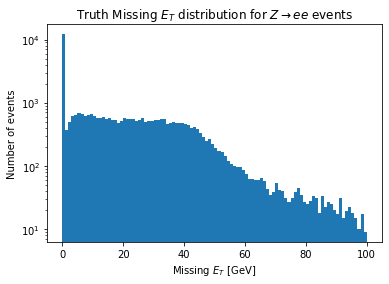

In [3]:
plt.hist(events.met, bins=100, range=(0, 100))
plt.xlabel('Missing $E_T$ [GeV]')
plt.ylabel('Number of events')
plt.yscale('log')
_ = plt.title(r'Truth Missing $E_T$ distribution for $Z\rightarrow ee$ events')

## Rebuilding MET

Only the default Missing $E_T$ is currently supported (built using the proper core for the jet collection you've used, and jets, electrons, and muons as input to the algorithm). Different missing $E_T$ calculations are not yet simply supported. Please see this [github issue](https://github.com/gordonwatts/xaod_usage/issues/5) for a discussion. It basically comes down to - what is a sensible way to do this without making it too "magic". Before designing an API a number of use cases need to be collected.

## The Datamodel

The data model when this documentation was last built was:

In [4]:
from func_adl_servicex_xaodr21.xAOD.missinget_v1 import MissingET_v1
help(MissingET_v1)

Help on class MissingET_v1 in module func_adl_servicex_xaodr21.xAOD.missinget_v1:

class MissingET_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  clearDecorations(self) -> 'bool'
 |      A method
 |  
 |  hasNonConstStore(self) -> 'bool'
 |      A method
 |  
 |  hasStore(self) -> 'bool'
 |      A method
 |  
 |  index(self) -> 'int'
 |      A method
 |  
 |  met(self) -> 'float'
 |      A method
 |  
 |  mpx(self) -> 'float'
 |      A method
 |  
 |  mpy(self) -> 'float'
 |      A method
 |  
 |  name(self) -> 'func_adl_servicex_xaodr21.str.str'
 |      A method
 |  
 |  nameHash(self) -> 'int'
 |      A method
 |  
 |  phi(self) -> 'float'
 |      A method
 |  
 |  sumet(self) -> 'float'
 |      A method
 |  
 |  usingPrivateStore(self) -> 'bool'
 |      A method
 |  
 |  usingStandaloneStore(self) -> 'bool'
 |      A method
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  auxdataCo

## Further Information

* The [`xAOD::MissingET_v1` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODMissingET/xAODMissingET/versions/MissingET_v1.h) with all the inline documentation.
* [Slides from a tutorial](https://indico.cern.ch/event/860971/contributions/3626404/attachments/1974159/3285070/met_200122.pdf) on Missing ET
* [Recommendations for R21](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/JetEtmissRecommendationsR21#MET_Recommendations) from the Jet/MissingET group's twiki page.